**Brain Tumor Classification**

Brain is one of the vital organs in the human body, which consists of billions of cells. The abnormal group of cell is formed from the uncontrolled division of cells, which is also called as tumor. Brain tumor are divided into two types such malignant (stage1) and benign (stage2) tumor. Low grade brain tumor is called as benign. Similarly, the high grade tumor is also called as malignant. Benign tumor is not cancerous tumor. Hence it doesn’t spread other parts of the brains. However the malignant tumor is a cancerous tumor. So it spreads rapidly with indefinite boundaries to other region of the body easily. It leads to immediate death.

Based on the image data build a Deep Learning model that can predict whether it can classify the image as of tumor image or a normal image.

**Task1: Load the required libraries**


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import cv2

import matplotlib.pyplot as plt
from keras.preprocessing.image import *
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.layers import Dense, BatchNormalization,Dropout
from PIL import Image
from os import listdir
from os.path import splitext

**Task2: List the directory to read the data**

In [2]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import os
path = '/content/gdrive/MyDrive/MachineLearning/Computer Vision/brain_tumor_dataset'
os.chdir(path)

In [4]:
#Converting all images to single extension as we have images from different extensions
def converting_img_extension(path,extn):
  for file in listdir(path):
    filename, extension = splitext(file)
    try:
        if extension not in ['.py', extn]:
            im = Image.open(path + '/' +filename + extension)
            im.save(path + '/' +filename + extn, "JPEG")
    except OSError:
        print('Cannot convert %s' % file)
  for images in listdir(path):
      if images.endswith((".png",".jpeg",".JPG")):
        os.remove(os.path.join(path, images))

In [5]:
converting_img_extension('no', '.jpg')
converting_img_extension('yes', '.jpg')

In [6]:
# def image_augmentation(path, prefix):
#   images = ImageDataGenerator().flow_from_directory(path)
#   datagen = ImageDataGenerator(
#     rotation_range=30, 
#     width_shift_range=0.3,
#     brightness_range=[0.2,1.0],
#     height_shift_range=0.3, 
#     shear_range=0.2, 
#     zoom_range=0.2,
#     horizontal_flip=True, 
#     vertical_flip=True,
#     fill_mode='nearest')

#   for i in listdir(path):
#     image = load_img(path + '/' +i)
#     x = img_to_array(image)
#     x = x.reshape((1,) + x.shape)
#     j = 0
#     for batch in datagen.flow(x, batch_size = 1, save_to_dir = path, save_prefix = prefix, save_format = 'jpg'):
#         j+= 1
#         if j>6:
#             break

In [7]:
# image_augmentation('no', 'no_new')
# image_augmentation('yes', 'yes_new')

In [8]:
CATEGORIES = ['no', 'yes']
DATADIR = '/content/gdrive/MyDrive/MachineLearning/Computer Vision/brain_tumor_dataset'
training_data = []
def create_training_data():
    for category in CATEGORIES :
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try :
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (128, 128))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()


In [9]:
import random
X = [] #features
y = [] #labels

for features, label in training_data:
    X.append(features)
    y.append(label)
   

In [10]:
X

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8), array([[[2, 2, 2],
         [2, 2, 2],
         [2, 2, 2],
         ...,
         [2, 2, 2],
         [2, 2, 2],
         [2, 2, 2]],
 
        [[2, 2

In [11]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [12]:
temp = list(zip(X, y))
random.seed(10)
random.shuffle(temp)
X,y  = zip(*temp)
# res1 and res2 come out as tuples, and so must be converted to lists.
X,y  = list(X), list(y) 

In [13]:
y

[0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,


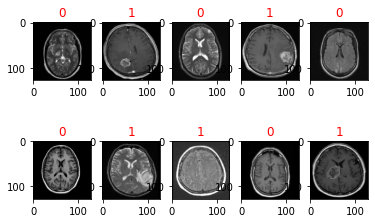

In [14]:
#Plotting the images in matplotlib
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X[i])
    plt.title(y[i],color='r')
 
plt.show()

**Task3: Create three empty lists data, paths, ans, Read the data under 'yes' and append the images in respective paths** 

**Task4: Read the data under 'no' and append the images in by respective paths**

In [15]:
def list_splitter(list_to_split, ratio):

    part1 = int(len(list_to_split) * ratio) 
    return list_to_split[:part1], list_to_split[part1:]
X_train,X_test = list_splitter(X,0.8)
y_train,y_test = list_splitter(y,0.8)


In [16]:
len(X_train),len(X_test)

(201, 51)

In [17]:
len(y_train),len(y_test)

(201, 51)

Convert the image data to array and check its shape**

In [18]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [19]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [20]:
X_train.shape

(201, 128, 128, 3)

In [21]:
y_train.shape

(201,)

In [22]:
X_train = X_train/255.0
X_test = X_test/255.0

In [23]:
X_train.shape

(201, 128, 128, 3)

Build a CNN model



In [24]:
classifier = keras.models.Sequential([# convolution layer
                                      keras.layers.Conv2D(32,(2,2),activation='relu',input_shape=(128,128,3),padding="same"),
                                      keras.layers.MaxPool2D(2,2),
                                      # BatchNormalization(),
                                      keras.layers.Conv2D(64,(2,2),activation='relu'),
                                      # keras.layers.MaxPool2D(pool_size = (2,2),strides=(2, 2)),
                                      # BatchNormalization(),
                                      # flattening layer
                                      keras.layers.Flatten(),
                                      # dense hidden layer
                                      keras.layers.Dense(300, activation='relu'),
                                      # keras.layers.Dense(100, activation='relu'),
                                      keras.layers.Dense(50,activation='relu'),
                                      keras.layers.Dense(25, activation='relu'),
                                      # keras.layers.Dense(100, activation='relu'),
                                      keras.layers.Dense(10,activation='relu'),
                                      keras.layers.Dense(5,activation='relu'),
                                      # dense output layer
                                      keras.layers.Dense(1,activation='sigmoid')
])

In [25]:
classifier.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [26]:
history = classifier.fit(X_train, y_train, batch_size=64, epochs=5)

Epoch 1/5
4/4 [==============================] - 7s 1s/step - loss: 0.7632 - accuracy: 0.5373
Epoch 2/5
4/4 [==============================] - 7s 1s/step - loss: 0.5728 - accuracy: 0.7214
Epoch 3/5
4/4 [==============================] - 6s 1s/step - loss: 0.4420 - accuracy: 0.8159
Epoch 4/5
4/4 [==============================] - 7s 2s/step - loss: 0.3463 - accuracy: 0.8557
Epoch 5/5
4/4 [==============================] - 6s 1s/step - loss: 0.2647 - accuracy: 0.9055


**Task11: Pass an image from 'no' folder and the check the model predictions**

In [27]:
from sklearn.metrics import classification_report

In [28]:
Y_pred = classifier.predict(X_train)

7/7 [==============================] - 1s 167ms/step


In [29]:
Y_pred

array([[0.03829595],
       [0.9298673 ],
       [0.10565388],
       [0.95548666],
       [0.09517907],
       [0.00894963],
       [0.8693789 ],
       [0.939833  ],
       [0.0354126 ],
       [0.9333447 ],
       [0.01166236],
       [0.19008912],
       [0.9952693 ],
       [0.03378955],
       [0.6324341 ],
       [0.04389424],
       [0.8360538 ],
       [0.9298673 ],
       [0.90858287],
       [0.00698103],
       [0.08755738],
       [0.97593504],
       [0.9904974 ],
       [0.8761635 ],
       [0.7630017 ],
       [0.9243705 ],
       [0.02322802],
       [0.00344878],
       [0.98108226],
       [0.9207988 ],
       [0.94204056],
       [0.881957  ],
       [0.7882695 ],
       [0.23965538],
       [0.8348993 ],
       [0.06902491],
       [0.83716613],
       [0.99453425],
       [0.04769342],
       [0.8837966 ],
       [0.7363016 ],
       [0.10491937],
       [0.85898906],
       [0.1035848 ],
       [0.9248817 ],
       [0.9832226 ],
       [0.3669867 ],
       [0.457

In [30]:
Y_pred = np.round(Y_pred)


In [31]:
Y_pred = list(Y_pred)

In [32]:
Y_pred  = [int(i) for i in Y_pred]

In [33]:
Y_pred = np.asarray(Y_pred)

In [34]:
Y_pred

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0])

In [35]:
Y_pred_test = np.round(classifier.predict(X_test))

2/2 [==============================] - 0s 137ms/step


In [36]:
Y_pred_test = list(Y_pred_test)
Y_pred_test  = [int(i) for i in Y_pred_test]
Y_pred_test = np.asarray(Y_pred_test)

In [37]:
print(classification_report(y_test,Y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80        21
           1       0.81      1.00      0.90        30

    accuracy                           0.86        51
   macro avg       0.91      0.83      0.85        51
weighted avg       0.89      0.86      0.86        51



In [38]:
print(classification_report(y_train,Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        77
           1       0.95      1.00      0.98       124

    accuracy                           0.97       201
   macro avg       0.98      0.96      0.97       201
weighted avg       0.97      0.97      0.97       201



In [40]:
from tensorflow.keras.utils import load_img
# load an image from file
image = load_img('no/1 no.jpg', target_size=(128, 128))

In [41]:
from tensorflow.keras.utils import img_to_array
# convert the image pixels to a numpy array
image = img_to_array(image)

In [42]:
image.shape

(128, 128, 3)

In [44]:
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

In [45]:
image.shape

(1, 128, 128, 3)

In [46]:
pred = np.round(classifier.predict(image))

1/1 [==============================] - 0s 70ms/step


In [47]:
pred

array([[0.]], dtype=float32)